In [456]:
import math
import matplotlib
import numpy as np
import pandas as pd
import time
from sklearn import metrics
from sklearn.metrics import r2_score
from datetime import date, datetime, time
from matplotlib import pyplot as plt

np.warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
#When making scatter plot for prediction and test we want the points to be close to the 45 degree line 
#or y=x line as it indicated a more accurate prediction.

In [ ]:
#Took daily instead of monthly for this firm by mistake.Other 2 are mothly.

## 1)Linear Regression

In [457]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\VTI.csv')

In [458]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

df.columns = [str(x).replace(' ', '_') for x in df.columns]

df.sort_values(by='Date', inplace=True, ascending=True)

df.head(10)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2011-06-06,67.360001,67.500000,66.660004,66.750000,55.114952,1893100
1,2011-06-07,67.040001,67.290001,66.699997,66.720001,55.090179,1369600
2,2011-06-08,66.610001,66.800003,66.269997,66.370003,54.801189,1482500
3,2011-06-09,66.559998,67.139999,66.379997,66.839996,55.189266,1047900
4,2011-06-10,66.580002,66.599998,65.730003,65.889999,54.404842,1743300
5,2011-06-13,66.010002,66.250000,65.550003,65.879997,54.396603,2814600
6,2011-06-14,66.510002,67.019997,66.480003,66.790001,55.147980,1577100
7,2011-06-15,66.250000,66.480003,65.430000,65.599998,54.165405,3630600
8,2011-06-16,65.620003,66.080002,65.180000,65.709999,54.256241,3040000
9,2011-06-17,66.360001,66.379997,65.690002,65.919998,54.429638,5544400


In [459]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from math import sqrt

In [460]:
dfreg = df.loc[:,['Open','Close','Adj_Close','Volume']]

In [461]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.01 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [462]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [463]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [464]:
print(clfreg.score(X_test, y_test))

0.9753351343229565


In [465]:
ypred=clfreg.predict(X_test)

In [466]:
print('MAE =',metrics.mean_absolute_error(y_test,ypred))
print('MSE =',metrics.mean_squared_error(y_test,ypred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test,ypred)))


MAE = 3.3265168011292756
MSE = 34.09477584182201
RMSE = 5.8390732005877455


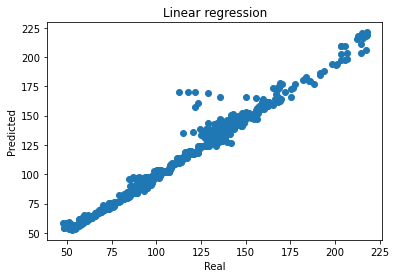

In [467]:
plt.scatter(y_test,ypred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Linear regression")
plt.show()

## 2)KNN

In [468]:
df = pd.read_csv(r'C:\Users\vkumar\Downloads\VTI.csv')

In [469]:
df.loc[:, 'Date'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')

df.columns = [str(x).replace(' ', '_') for x in df.columns]

df.sort_values(by='Date', inplace=True, ascending=True)

df.head(10)

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2011-06-06,67.360001,67.500000,66.660004,66.750000,55.114952,1893100
1,2011-06-07,67.040001,67.290001,66.699997,66.720001,55.090179,1369600
2,2011-06-08,66.610001,66.800003,66.269997,66.370003,54.801189,1482500
3,2011-06-09,66.559998,67.139999,66.379997,66.839996,55.189266,1047900
4,2011-06-10,66.580002,66.599998,65.730003,65.889999,54.404842,1743300
5,2011-06-13,66.010002,66.250000,65.550003,65.879997,54.396603,2814600
6,2011-06-14,66.510002,67.019997,66.480003,66.790001,55.147980,1577100
7,2011-06-15,66.250000,66.480003,65.430000,65.599998,54.165405,3630600
8,2011-06-16,65.620003,66.080002,65.180000,65.709999,54.256241,3040000
9,2011-06-17,66.360001,66.379997,65.690002,65.919998,54.429638,5544400


In [470]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from math import sqrt

In [471]:
dfreg = df.loc[:,['Open','Close','Adj_Close','Volume']]

In [472]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [473]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [474]:
clfknn = KNeighborsRegressor(n_neighbors=6)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [475]:
print(clfknn.score(X_test, y_test))

0.9622980187762636


In [476]:
rmse_val = [] 
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    error = np.sqrt(metrics.mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 8.882186097713356
RMSE value for k=  2 is: 8.438479589610646
RMSE value for k=  3 is: 8.122218664638224
RMSE value for k=  4 is: 7.705584116590732
RMSE value for k=  5 is: 7.681900629429339
RMSE value for k=  6 is: 7.417451956377935
RMSE value for k=  7 is: 7.378379806245568
RMSE value for k=  8 is: 7.420766672424821
RMSE value for k=  9 is: 7.471068915278984
RMSE value for k=  10 is: 7.52179968362091
RMSE value for k=  11 is: 7.413980651274299
RMSE value for k=  12 is: 7.470615818961221
RMSE value for k=  13 is: 7.4440090468947036
RMSE value for k=  14 is: 7.420056830008387
RMSE value for k=  15 is: 7.550184996959307


Text(0, 0.5, 'RMSE')

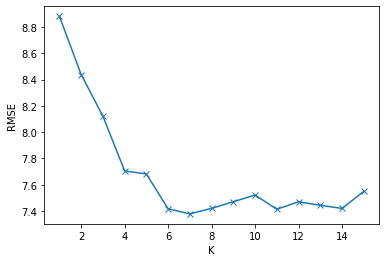

In [477]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, K+1), rmse_val, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('K')
plt.ylabel('RMSE')

In [478]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [479]:
mape=[]
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    error = get_mape(y_test,pred)
    mape.append(error) 

Text(0, 0.5, 'MAPE')

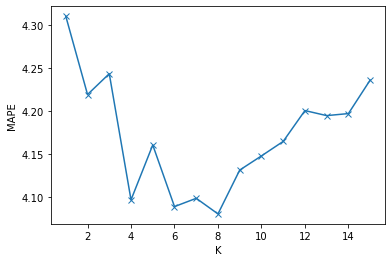

In [480]:
plt.figure(figsize=(6,4))
plt.plot(range(1, K+1), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')

plt.xlabel('K')
plt.ylabel('MAPE')


In [481]:
R2=[]
for K in range(15):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  
    pred=model.predict(X_test)
    error = r2_score(y_test,pred)
    R2.append(error) 
print(R2)

[0.945937711583921, 0.9512041264359964, 0.9547931711554868, 0.9593120489684263, 0.9595617773901959, 0.9622980187762636, 0.9626941703488384, 0.9622643146723365, 0.96175099220729, 0.96122978445883, 0.962333298938883, 0.9617556314253901, 0.9620275627337932, 0.962271533632344, 0.9609366149324335]


Text(0, 0.5, 'R2')

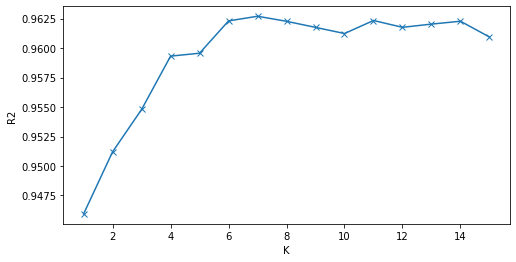

In [482]:
plt.figure(figsize=(8, 4))
plt.plot(range(1,K+1), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('K')
plt.ylabel('R2')

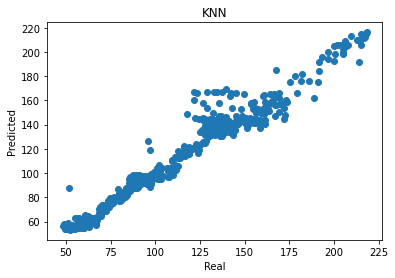

In [483]:
plt.scatter(y_test,pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("KNN")
plt.show()

## 3)Random Forest

In [484]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier


In [485]:
dfreg = df.loc[:,['Open','Close','Adj_Close','Volume']]

In [486]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [488]:
clf = RandomForestRegressor(n_estimators = 50,random_state=42)

In [489]:
model = clf.fit(X_train, y_train)

In [490]:
print(model.score(X_test, y_test))

0.9823870147914048


In [491]:
Rmse=[]
for n in range(10,100,5):
    clf = RandomForestRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    Rmse.append(error)
    print('RMSE value for n_estimators= ' , n , 'is:', error)

RMSE value for n_estimators=  10 is: 5.355576428214545
RMSE value for n_estimators=  15 is: 5.218891708867372
RMSE value for n_estimators=  20 is: 5.1856376882816315
RMSE value for n_estimators=  25 is: 5.129749079934298
RMSE value for n_estimators=  30 is: 5.084859484314223
RMSE value for n_estimators=  35 is: 5.112693941677314
RMSE value for n_estimators=  40 is: 5.08155324510807
RMSE value for n_estimators=  45 is: 5.092517837244538
RMSE value for n_estimators=  50 is: 5.069780315352776
RMSE value for n_estimators=  55 is: 5.078890962303417
RMSE value for n_estimators=  60 is: 5.087723378013518
RMSE value for n_estimators=  65 is: 5.068093197626641
RMSE value for n_estimators=  70 is: 5.065206973862719
RMSE value for n_estimators=  75 is: 5.057780085092589
RMSE value for n_estimators=  80 is: 5.072348501875419
RMSE value for n_estimators=  85 is: 5.05741011438554
RMSE value for n_estimators=  90 is: 5.05488668536229
RMSE value for n_estimators=  95 is: 5.0819069878756835


Text(0, 0.5, 'RMSE')

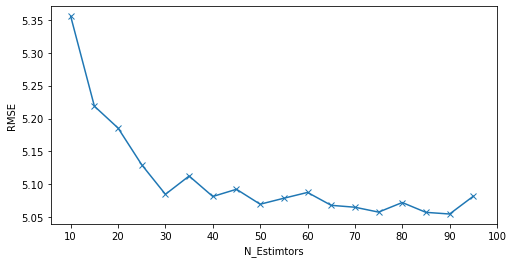

In [492]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), Rmse, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimtors')
plt.ylabel('RMSE')

In [493]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [494]:
mape=[]
for n in range(10,100,5): 
    clf = RandomForestRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=get_mape(y_test,y_pred)
    mape.append(error)
print(mape)

[2.9359180438888135, 2.8791644850203113, 2.8511639810684084, 2.841795420609349, 2.834975604668485, 2.858327307108888, 2.838650006484949, 2.8342566280852095, 2.8326503117335524, 2.8265251780701584, 2.8235307859566463, 2.812699647853355, 2.8087826790092483, 2.812115767688324, 2.821013379994203, 2.8172976445768767, 2.8107637773351706, 2.817169165258696]


Text(0, 0.5, 'MAPE')

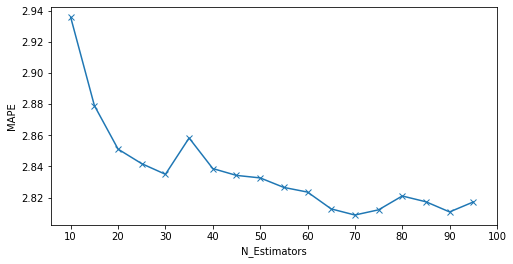

In [495]:
plt.figure(figsize=(8,4))
plt.plot(range(10,100,5), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('MAPE')

In [496]:
R2=[]
for n in range(10,100,5): 
    clf = RandomForestRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = r2_score(y_test,y_pred)
    R2.append(error) 
print(R2)


[0.9803452677670524, 0.9813357192054991, 0.9815728136029198, 0.9819678740042137, 0.9822820855292045, 0.9820875793346365, 0.9823051188574765, 0.9822286751155533, 0.9823870147914048, 0.9823236550943771, 0.9822621217472013, 0.982398735313167, 0.9824187770610483, 0.9824702964009693, 0.9823691659359051, 0.9824728608618685, 0.9824903470678683, 0.9823026551800159]


Text(0, 0.5, 'R2')

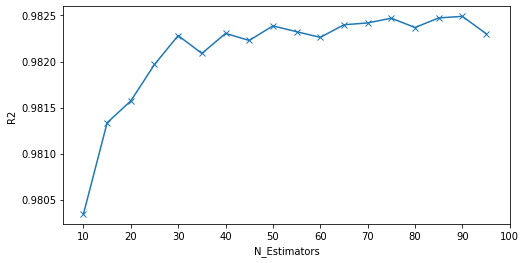

In [497]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('R2')

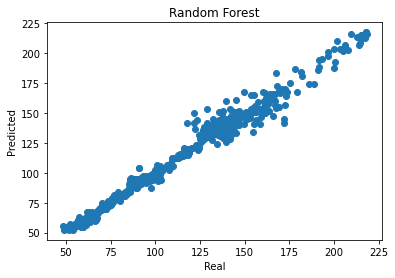

In [498]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Random Forest")
plt.show()

## 4)XGBoost 

In [499]:
from xgboost import XGBRegressor

In [500]:
dfreg = df.loc[:,['Open','Close','Adj_Close','Volume']]

In [501]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [503]:
clfxgb = XGBRegressor(eval_metric = "mlogloss",n_estimators=15)
clfxgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=15, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [504]:
print(clfxgb.score(X_test, y_test))

0.97755838721733


In [505]:
Rmse=[]
for n in range(10,100,5):
    clf = XGBRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    Rmse.append(error)
    print('RMSE value for n_estimators= ' , n , 'is:', error)

RMSE value for n_estimators=  10 is: 6.9626426755147515
RMSE value for n_estimators=  15 is: 5.722682979969
RMSE value for n_estimators=  20 is: 5.547909941514251
RMSE value for n_estimators=  25 is: 5.384061252418326
RMSE value for n_estimators=  30 is: 5.363708830129269
RMSE value for n_estimators=  35 is: 5.366628034039962
RMSE value for n_estimators=  40 is: 5.299385266010063
RMSE value for n_estimators=  45 is: 5.314959923757722
RMSE value for n_estimators=  50 is: 5.28608204907329
RMSE value for n_estimators=  55 is: 5.264374696906874
RMSE value for n_estimators=  60 is: 5.243681628849894
RMSE value for n_estimators=  65 is: 5.242027759778185
RMSE value for n_estimators=  70 is: 5.251365882814421
RMSE value for n_estimators=  75 is: 5.2511191520779805
RMSE value for n_estimators=  80 is: 5.25958435036536
RMSE value for n_estimators=  85 is: 5.263885432657015
RMSE value for n_estimators=  90 is: 5.258610029649329
RMSE value for n_estimators=  95 is: 5.236890476116313


Text(0, 0.5, 'RMSE')

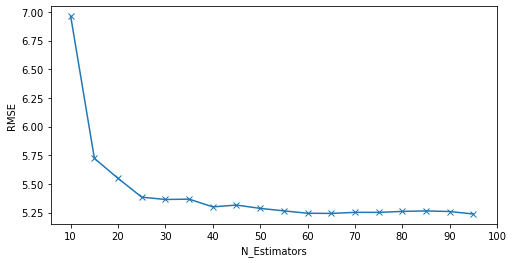

In [506]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), Rmse, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('RMSE')

In [507]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [508]:
mape=[]
for n in range(10,100,5): 
    clf = XGBRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=get_mape(y_test,y_pred)
    mape.append(error)
print(mape)

[4.3971810564479235, 3.269487209314595, 3.1649838944471798, 3.06850105755024, 3.019347352389469, 3.0191355295901645, 2.9613944544977278, 2.9638424103901495, 2.9531924512359367, 2.9307849274334155, 2.921789887211866, 2.924065029045595, 2.9290634134030364, 2.9152784864387495, 2.916302149525527, 2.9146685186505796, 2.9155322023407515, 2.895037096724245]


Text(0, 0.5, 'MAPE')

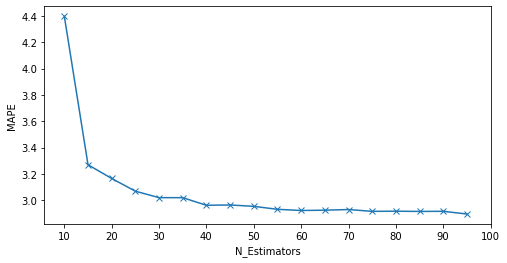

In [509]:
plt.figure(figsize=(8,4))
plt.plot(range(10,100,5), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('MAPE')

In [510]:
R2=[]
for n in range(10,100,5): 
    clf = XGBRegressor(n_estimators = n,random_state=42)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = r2_score(y_test,y_pred)
    R2.append(error) 
print(R2)

[0.9667797494165177, 0.97755838721733, 0.9789082073123121, 0.9801356356297307, 0.980285531325145, 0.9802640662468384, 0.9807555423344163, 0.9806422588998002, 0.9808520410199243, 0.9810089807141505, 0.981157986100163, 0.9811698698535734, 0.9811027222920918, 0.981104497993811, 0.9810435269529141, 0.9810125105521897, 0.9810505495510656, 0.9812067595165016]


Text(0, 0.5, 'R2')

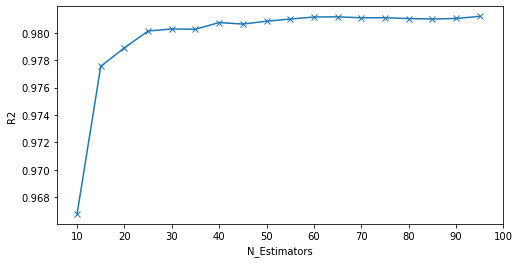

In [511]:
plt.figure(figsize=(8, 4))
plt.plot(range(10, 100,5), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.xlabel('N_Estimators')
plt.ylabel('R2')

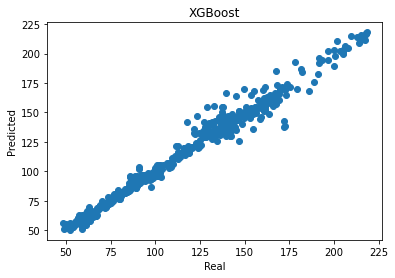

In [512]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("XGBoost")
plt.show()

## 5)Neural Network

In [513]:
from sklearn.neural_network import MLPRegressor

In [514]:
dfreg = df.loc[:,['Open','Close','Adj_Close','Volume']]

In [515]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.02 * len(dfreg)))

dfreg['label'] = dfreg['Adj_Close'].shift(-forecast_out)

X = np.array(dfreg.drop(['label'], 1))

X = preprocessing.scale(X)

X = X[:-forecast_out]
X_lately = X[-forecast_out:]

y = np.array(dfreg['label'])

y = y[:-forecast_out]

In [516]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [517]:
clfmlp=MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=225)
clfmlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=225)

In [518]:
print(clfmlp.score(X_test, y_test))

0.9644739003200082


In [519]:
Rmse=[]
for n in range(200,401,25):
    clf = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=n)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    Rmse.append(error)
    print('RMSE value for max_iter= ' , n , 'is:', error)

RMSE value for max_iter=  200 is: 7.208124948971652
RMSE value for max_iter=  225 is: 7.271108313624438
RMSE value for max_iter=  250 is: 7.0163800195334085
RMSE value for max_iter=  275 is: 7.027986608602642
RMSE value for max_iter=  300 is: 6.762061990860993
RMSE value for max_iter=  325 is: 6.968103253139186
RMSE value for max_iter=  350 is: 6.6741376239854056
RMSE value for max_iter=  375 is: 6.766241880433744
RMSE value for max_iter=  400 is: 6.623090702895257


Text(0, 0.5, 'RMSE')

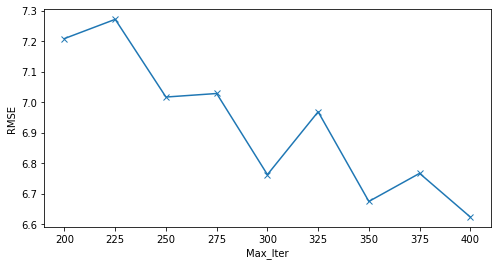

In [520]:
plt.figure(figsize=(8, 4))
plt.plot(range(200, 401,25), Rmse, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('Max_Iter')
plt.ylabel('RMSE')

In [521]:
def get_mape(y_true, y_pred): 
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [522]:
mape=[]
for n in range(200,401,25): 
    clf = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=n)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error=get_mape(y_test,y_pred)
    mape.append(error)
print(mape)

[3.902978420842636, 3.752946902622113, 3.8014584166559646, 3.6837588768764222, 3.5938115504503148, 3.7572757039248894, 3.5222551400954196, 3.7994335520396163, 3.686480057654791]


Text(0, 0.5, 'MAPE')

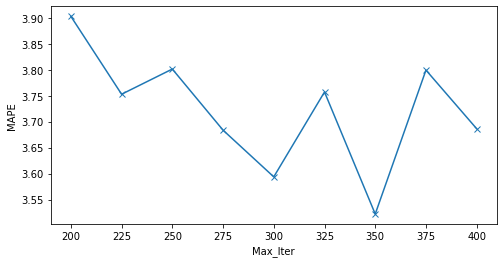

In [523]:
plt.figure(figsize=(8,4))
plt.plot(range(200,401,25), mape, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('Max_Iter')
plt.ylabel('MAPE')

In [524]:
R2=[]
for n in range(200,401,25): 
    clf = MLPRegressor(hidden_layer_sizes=(150,100,50), max_iter=n)
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = r2_score(y_test,y_pred)
    R2.append(error) 
print(R2)

[0.9629038145616874, 0.9650084815679438, 0.9657881717248009, 0.9675813546868696, 0.9631918010934083, 0.9678051378867876, 0.9682960398276472, 0.9668153035711249, 0.9690968834156235]


Text(0, 0.5, 'R2')

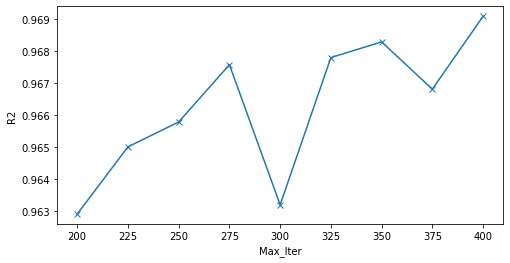

In [525]:
plt.figure(figsize=(8, 4))
plt.plot(range(200, 401,25), R2, 'x-')
plt.grid(b=True, which='minor', color='w', linestyle='-')
plt.xlabel('Max_Iter')
plt.ylabel('R2')

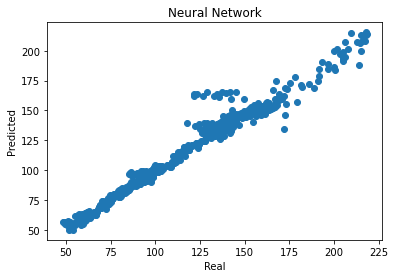

In [526]:
plt.scatter(y_test,y_pred)
plt.xlabel("Real")
plt.ylabel("Predicted")
plt.title("Neural Network")
plt.show()